## Importing necessary libraries

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pandas as pd
import matplotlib.cm as cm
import scipy.stats as stats
import random

mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'

AxesLabel, TickLabel = [10, 10]
plt.rcParams.update({
    'font.size' : TickLabel,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel,               # -> axis labels
    'legend.fontsize': AxesLabel,              # -> legends
    'xtick.labelsize': TickLabel,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel,              # -> y-axis tick labels
})
from os.path import dirname, join as pjoin
import scipy.io as sio
import statistics

## Importing datasets

In [2]:
mat_contents = sio.loadmat('InnerRaceFault_vload_1.mat')
mat_contents1 = sio.loadmat('OuterRaceFault_vload_1.mat')

In [3]:
sorted(mat_contents1.keys())

['BPFI',
 'BPFO',
 'BSF',
 'FTF',
 '__globals__',
 '__header__',
 '__version__',
 'bearing']

In [4]:
teststruct = mat_contents['bearing']
teststruct1 = mat_contents1['bearing']

a = np.linspace(0,teststruct['gs'][0,0].shape[0]/ teststruct1['sr'][0,0],teststruct['gs'][0,0].shape[0])[:,:,0]

## Plotting time series of inner and outer fault datasets

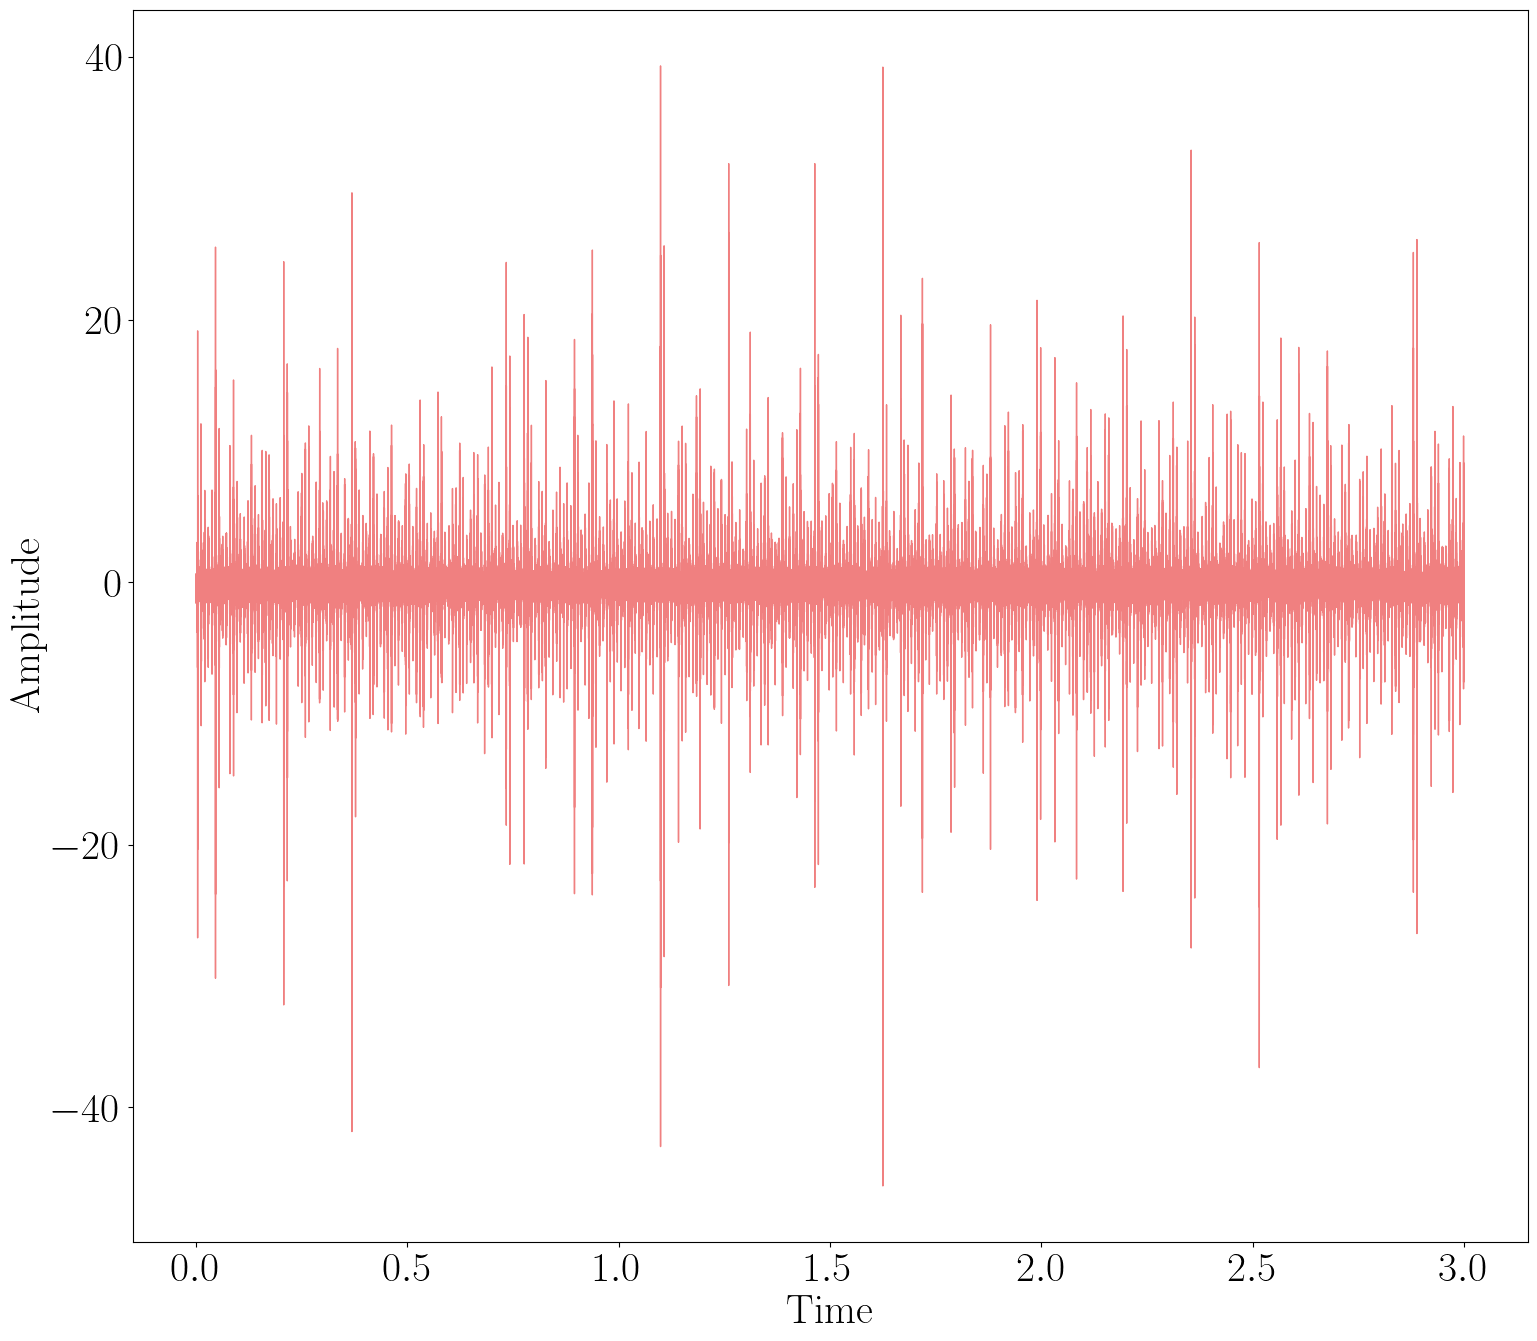

In [5]:
AxesLabel1, TickLabel1 = [30, 30]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})

fig, ax = plt.subplots(1, figsize=(18, 16))

aa = np.linspace(0,1,teststruct['gs'][0,0].shape[0])
bb = np.linspace(0,1,teststruct1['gs'][0,0].shape[0])

ax.plot(a, teststruct['gs'][0,0], 'lightcoral', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.savefig('Plots/1ai.pdf', bbox_inches='tight')

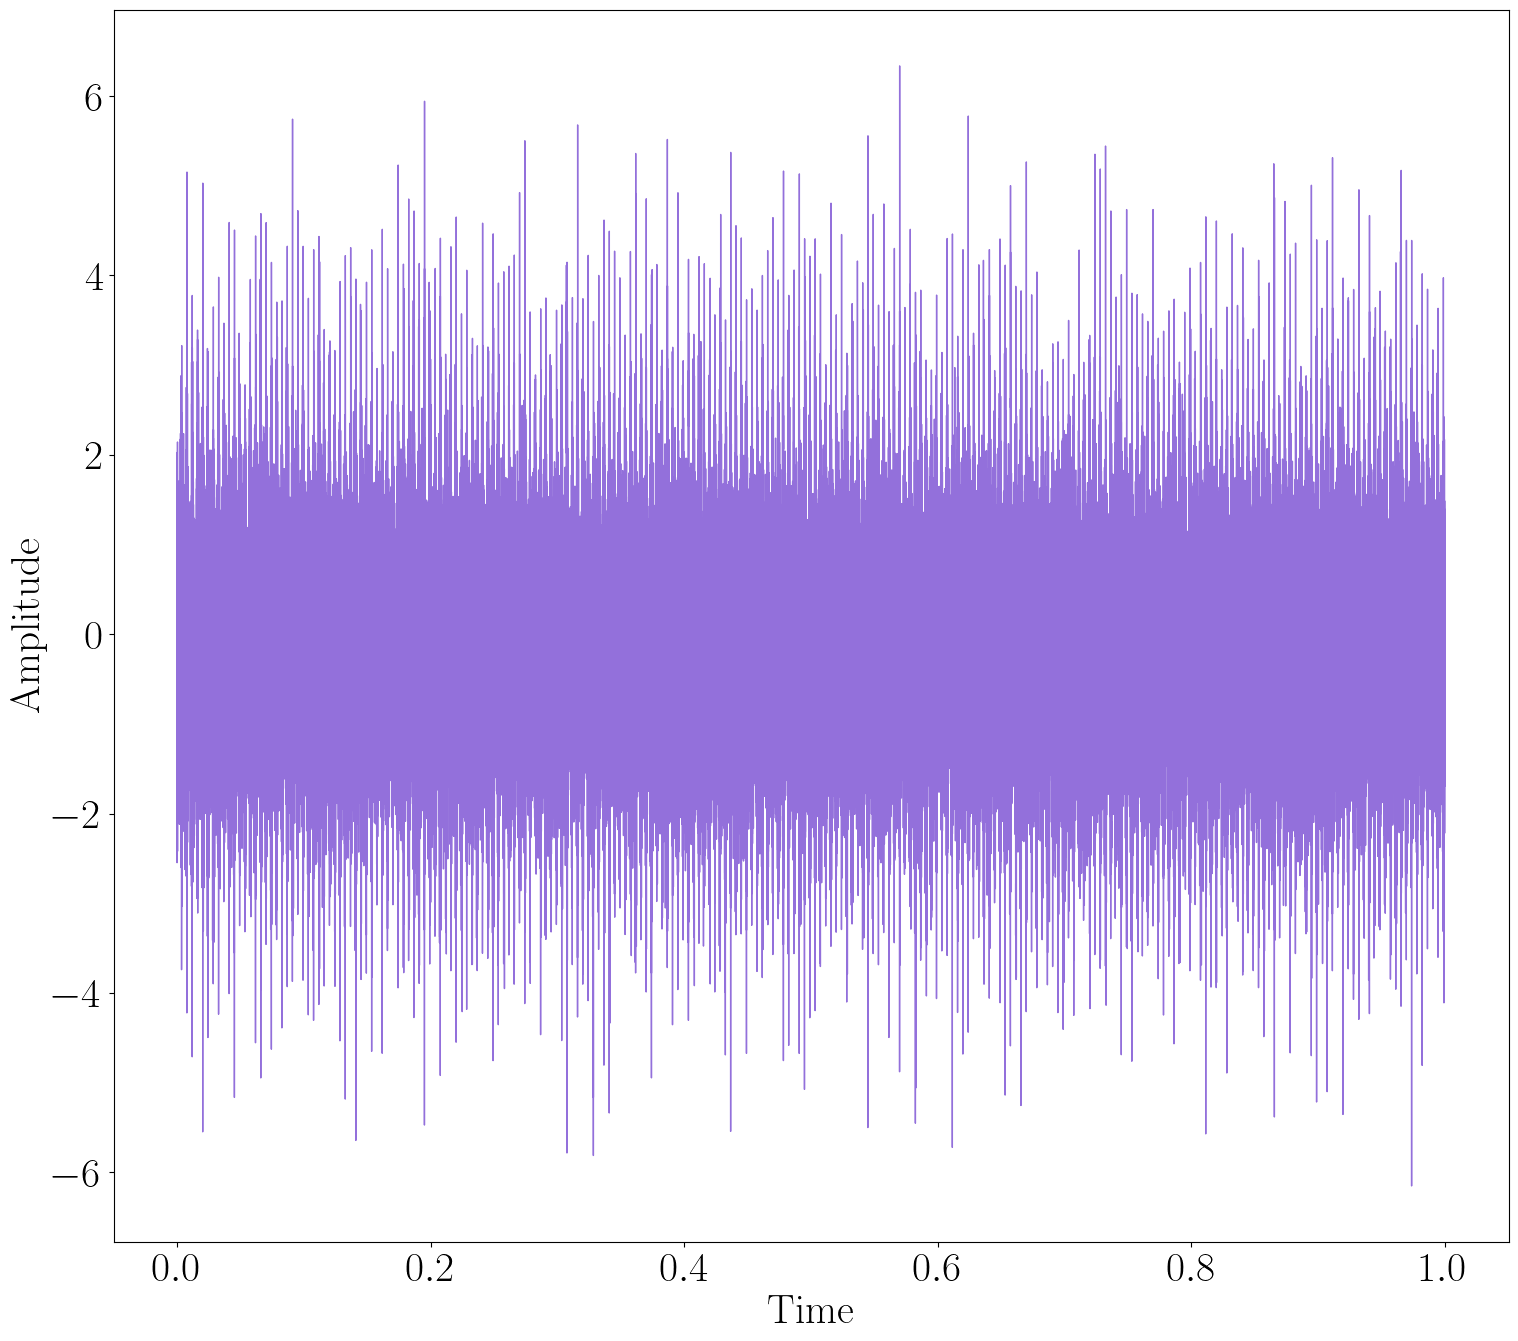

In [6]:
fig, ax = plt.subplots(1, figsize=(18, 16))

bb = np.linspace(0,1,teststruct1['gs'][0,0].shape[0])

ax.plot(bb, teststruct1['gs'][0,0], 'mediumpurple', linewidth=1)
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.savefig('Plots/1aii.pdf', bbox_inches='tight')

## A quick PDF check

<BarContainer object of 100 artists>

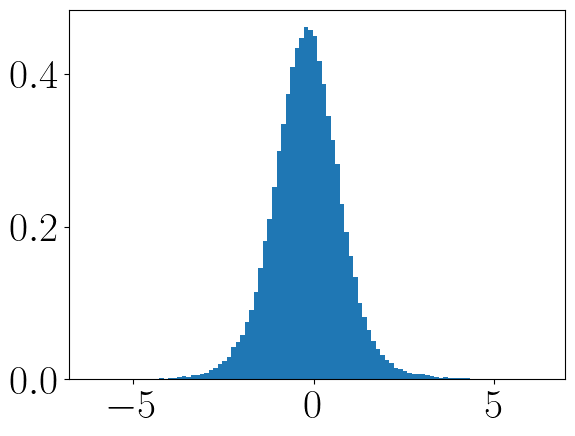

In [7]:
hist, bin_edges = np.histogram(teststruct1['gs'][0,0], bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf = hist / np.sum(hist)

plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0])

<BarContainer object of 100 artists>

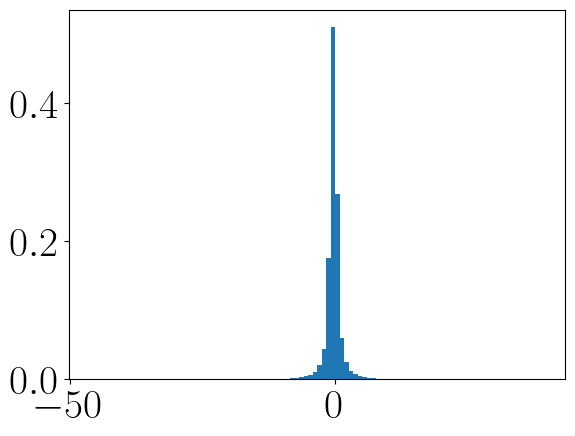

In [8]:
hist, bin_edges = np.histogram(teststruct['gs'][0,0], bins=100, density=True)
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
pdf = hist / np.sum(hist)

plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0])

## Importing inner and outer fault datasets

In [9]:
inner = np.zeros([5,146484])

inner1 = sio.loadmat('InnerRaceFault_vload_1.mat')
inner[0,:] = inner1['bearing']['gs'][0,0].ravel()
inner2 = sio.loadmat('InnerRaceFault_vload_2.mat')
inner[1,:] = inner2['bearing']['gs'][0,0].ravel()
inner3 = sio.loadmat('InnerRaceFault_vload_3.mat')
inner[2,:] = inner3['bearing']['gs'][0,0].ravel()
inner4 = sio.loadmat('InnerRaceFault_vload_4.mat')
inner[3,:] = inner4['bearing']['gs'][0,0].ravel()
inner5 = sio.loadmat('InnerRaceFault_vload_5.mat')
inner[4,:] = inner5['bearing']['gs'][0,0].ravel()

outer = np.zeros([5,146484])

outer1 = sio.loadmat('OuterRaceFault_vload_1.mat')
outer[0,:] = outer1['bearing']['gs'][0,0].ravel()
outer2 = sio.loadmat('OuterRaceFault_vload_2.mat')
outer[1,:] = outer2['bearing']['gs'][0,0].ravel()
outer3 = sio.loadmat('OuterRaceFault_vload_3.mat')
outer[2,:] = outer3['bearing']['gs'][0,0].ravel()
outer4 = sio.loadmat('OuterRaceFault_vload_4.mat')
outer[3,:] = outer4['bearing']['gs'][0,0].ravel()
outer5 = sio.loadmat('OuterRaceFault_vload_5.mat')
outer[4,:] = outer5['bearing']['gs'][0,0].ravel()

## Computing mean of the datasets

In [10]:
innerMean = np.zeros([5,1])

innerMean[0] = statistics.mean(inner1['bearing']['gs'][0,0].ravel())
innerMean[1] = statistics.mean(inner2['bearing']['gs'][0,0].ravel())
innerMean[2] = statistics.mean(inner3['bearing']['gs'][0,0].ravel())
innerMean[3] = statistics.mean(inner4['bearing']['gs'][0,0].ravel())
innerMean[4] = statistics.mean(inner5['bearing']['gs'][0,0].ravel())

outerMean = np.zeros([5,1])

outerMean[0] = statistics.mean(outer1['bearing']['gs'][0,0].ravel())
outerMean[1] = statistics.mean(outer2['bearing']['gs'][0,0].ravel())
outerMean[2] = statistics.mean(outer3['bearing']['gs'][0,0].ravel())
outerMean[3] = statistics.mean(outer4['bearing']['gs'][0,0].ravel())
outerMean[4] = statistics.mean(outer5['bearing']['gs'][0,0].ravel())

## Computing standard deviation of the datasets

In [11]:
innerStdev = np.zeros([5,1])

innerStdev[0] = statistics.stdev(inner1['bearing']['gs'][0,0].ravel())
innerStdev[1] = statistics.stdev(inner2['bearing']['gs'][0,0].ravel())
innerStdev[2] = statistics.stdev(inner3['bearing']['gs'][0,0].ravel())
innerStdev[3] = statistics.stdev(inner4['bearing']['gs'][0,0].ravel())
innerStdev[4] = statistics.stdev(inner5['bearing']['gs'][0,0].ravel())

outerStdev = np.zeros([5,1])

outerStdev[0] = statistics.stdev(outer1['bearing']['gs'][0,0].ravel())
outerStdev[1] = statistics.stdev(outer2['bearing']['gs'][0,0].ravel())
outerStdev[2] = statistics.stdev(outer3['bearing']['gs'][0,0].ravel())
outerStdev[3] = statistics.stdev(outer4['bearing']['gs'][0,0].ravel())
outerStdev[4] = statistics.stdev(outer5['bearing']['gs'][0,0].ravel())

## Plotting fault classification with mean and standard deviation as features

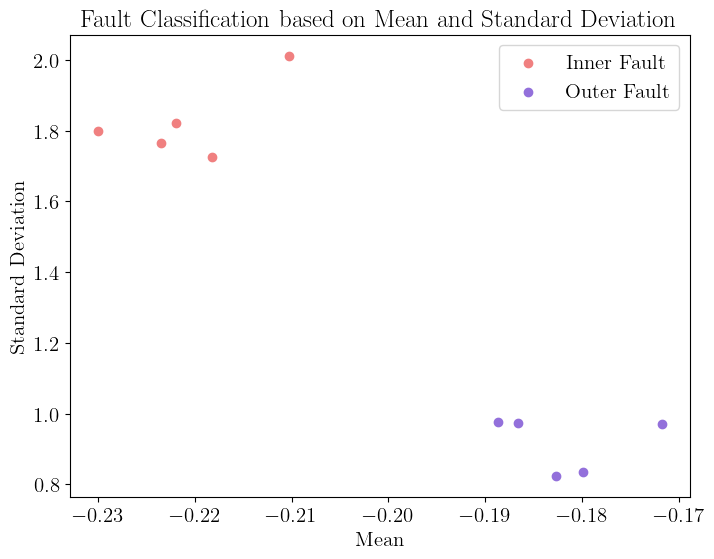

In [12]:
AxesLabel1, TickLabel1 = [15, 15]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})


plt.figure(figsize=(8, 6))

plt.scatter(innerMean, innerStdev, color='lightcoral', label='Inner Fault')
plt.scatter(outerMean, outerStdev, color='mediumpurple', label='Outer Fault')
plt.title('Fault Classification based on Mean and Standard Deviation')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.legend()

plt.savefig('Plots/1ci.pdf', bbox_inches='tight')

In [13]:
innerFluc = inner - innerMean
innerSkewness = np.divide(np.mean(np.power(innerFluc,3),axis=1), np.power(innerStdev,3).ravel())
innerKurtosis = np.divide(np.mean(np.power(innerFluc,4),axis=1), np.power(innerStdev,4).ravel())

outerFluc = outer - outerMean
outerSkewness = np.divide(np.mean(np.power(outerFluc,3),axis=1), np.power(outerStdev,3).ravel())
outerKurtosis = np.divide(np.mean(np.power(outerFluc,4),axis=1), np.power(outerStdev,4).ravel())

## Plotting fault classification with skewness and kurtosis as features

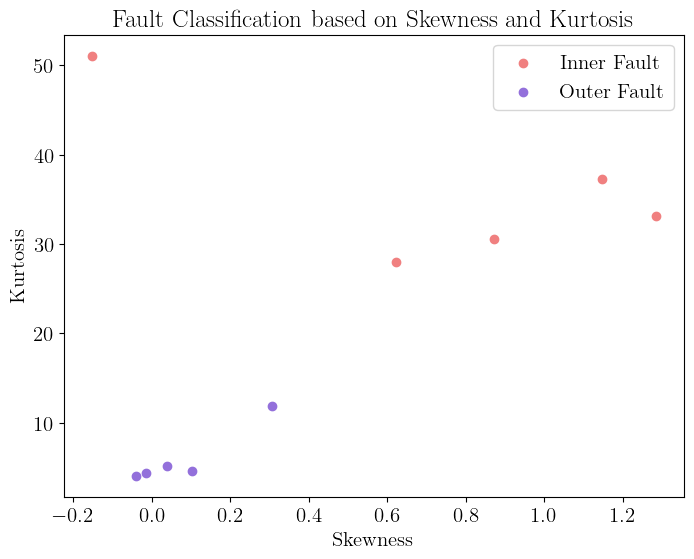

In [14]:
AxesLabel1, TickLabel1 = [15, 15]
plt.rcParams.update({
    'font.size' : TickLabel1,                   # Set font size to 11pt
    'axes.labelsize': AxesLabel1,               # -> axis labels
    'legend.fontsize': AxesLabel1,              # -> legends
    'xtick.labelsize': TickLabel1,              # -> x-axis tick labels
    'ytick.labelsize': TickLabel1,              # -> y-axis tick labels
})


plt.figure(figsize=(8, 6))

plt.scatter(innerSkewness, innerKurtosis, color='lightcoral', label='Inner Fault')
plt.scatter(outerSkewness, outerKurtosis, color='mediumpurple', label='Outer Fault')
plt.title('Fault Classification based on Skewness and Kurtosis')
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
plt.legend()

plt.savefig('Plots/1cii.pdf', bbox_inches='tight')

## Dividing the datasets into 10 equal sub-intervals

In [15]:
num = 10
subSize = inner.shape[1] // num

innerMeanSub = []
innerStdSub = []
outerMeanSub = []
outerStdSub = []

for i in range(num):
    for j in range(5):
        startInd = i * subSize
        endInd = (i + 1) * subSize

        innerSub = inner[j][startInd:endInd]
        outerSub = outer[j][startInd:endInd]

        tempInnerMean = statistics.mean(innerSub)
        tempInnerStd = statistics.stdev(innerSub)
        tempOuterMean = statistics.mean(outerSub)
        tempOuterStd = statistics.stdev(outerSub)

        innerMeanSub.append(tempInnerMean)
        innerStdSub.append(tempInnerStd)
        outerMeanSub.append(tempOuterMean)
        outerStdSub.append(tempOuterStd)

In [18]:
innerSkewSub = []
innerKurtosisSub = []
outerSkewSub = []
outerKurtosisSub = []

for i in range(num):
    for j in range(5):
        startInd = i * subSize
        endInd = (i + 1) * subSize

        innerSub = inner[j][startInd:endInd]
        outerSub = outer[j][startInd:endInd]

        tempInnerSkew = stats.skew(innerSub)
        tempInnerKurtosis = stats.kurtosis(innerSub)
        tempOuterSkew = stats.skew(outerSub)
        tempOuterKurtosis = stats.kurtosis(outerSub)

        innerSkewSub.append(tempInnerSkew)
        innerKurtosisSub.append(tempInnerKurtosis)
        outerSkewSub.append(tempOuterSkew)
        outerKurtosisSub.append(tempOuterKurtosis)

## Fault classification plots with new datasets

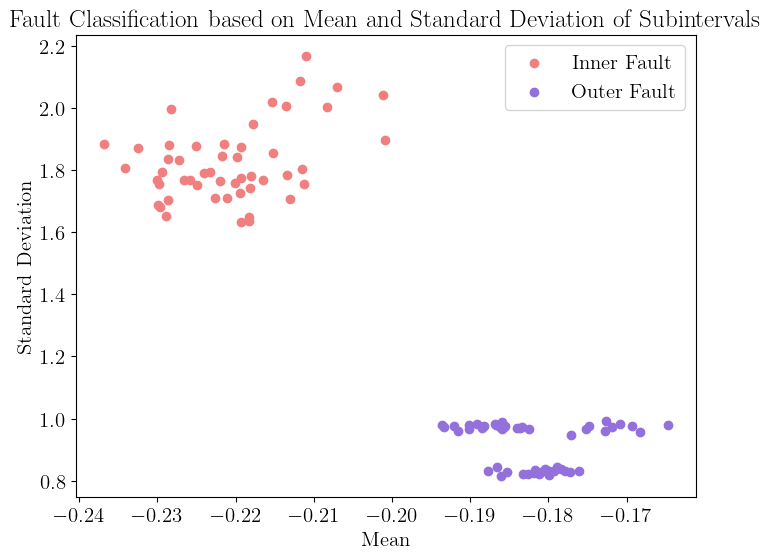

In [19]:
plt.figure(figsize=(8, 6))

plt.scatter(innerMeanSub, innerStdSub, color='lightcoral', label='Inner Fault')
plt.scatter(outerMeanSub, outerStdSub, color='mediumpurple', label='Outer Fault')

plt.title('Fault Classification based on Mean and Standard Deviation of Subintervals')
plt.xlabel('Mean')
plt.ylabel('Standard Deviation')
plt.legend()

plt.savefig('Plots/1di.pdf', bbox_inches='tight')

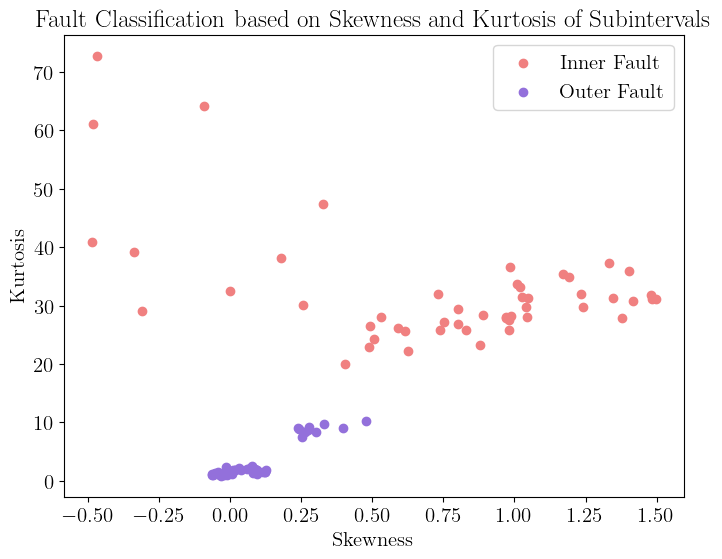

In [20]:
plt.figure(figsize=(8, 6))

plt.scatter(innerSkewSub, innerKurtosisSub, color='lightcoral', label='Inner Fault')
plt.scatter(outerSkewSub, outerKurtosisSub, color='mediumpurple', label='Outer Fault')

plt.title('Fault Classification based on Skewness and Kurtosis of Subintervals')
plt.xlabel('Skewness')
plt.ylabel('Kurtosis')
plt.legend()

plt.savefig('Plots/1dii.pdf', bbox_inches='tight')